Decision Tree Classifier


Step 1 Read the dataset

In [128]:
from warnings import filterwarnings
filterwarnings('ignore')

In [129]:
import pandas as pd
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Display all the unique data present in Drug Column


df['Drug'].unique()

Step2: Perform basic data quality checks

In [130]:
df.shape

(200, 6)

In [131]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [133]:
# check for missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [134]:
df.duplicated().sum()

np.int64(0)

In [135]:
df = df.drop_duplicates()

Step3: Separate data into X and Y features

Y: Drug to be predicted



In [136]:

df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [137]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [138]:

X.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


Y.head()

Step4 : Data Preprocessing and Data cleaning

In [139]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [140]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [141]:
print(cat,con,sep='\n')

['Sex', 'BP', 'Cholesterol']
['Age', 'Na_to_K']


In [142]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [143]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)


In [144]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [145]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [146]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794



Step5: Split the data into training and testing

In [147]:

from sklearn.model_selection import train_test_split

In [148]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)


In [149]:

xtrain.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
114,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.473377,-0.944158
173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.200874,0.368382
5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.352186,-1.037693
126,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.314011,0.036431
117,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.261469,-0.830085


In [150]:

xtest.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
95,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.503851,-0.646762
15,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.715759,-0.078892
30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.594568,-1.017848
158,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.889843,-0.782762
128,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.162699,2.422679


In [151]:


ytrain.head()

,Drug
114,drugX
173,DrugY
5,drugX
126,DrugY
117,drugX


In [152]:

ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY



Step6: Build the Decision Tree mode

In [153]:

from sklearn.tree import DecisionTreeClassifier

In [154]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
)

In [155]:
dtc.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [156]:

dtc.score(xtrain,ytrain)

1.0

In [157]:

dtc.score(xtest,ytest)

1.0

Step7: Hyperparameter tuning

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [160]:
base_model = DecisionTreeClassifier()

In [161]:
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [162]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [163]:
gscv.best_score_

np.float64(0.9873015873015873)

In [164]:
gscv.score(xtrain,ytrain)

1.0

In [165]:

gscv.score(xtest,ytest)

1.0

In [166]:
best_dtc = gscv.best_estimator_
best_dtc


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Step8: Evaluation Metrics
Confusion Matrix

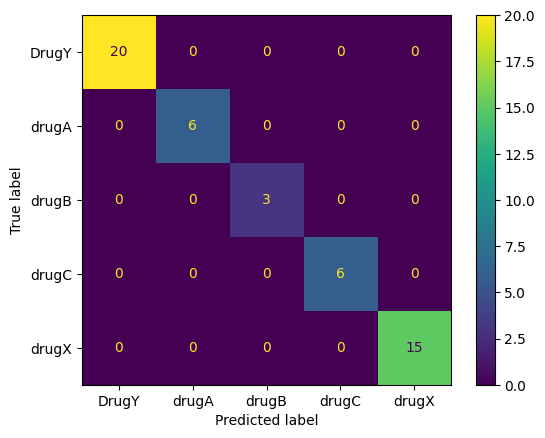

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [168]:
from sklearn.metrics import classification_report
ypred_test = best_dtc.predict(xtest)
ypred_test[:5]


array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [169]:

ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [170]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        20
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Step9: Plot the decision tree

In [171]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [172]:

xtrain.columns

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

In [173]:
fea_names = xtrain.columns
fea_names

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

In [174]:
Y['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [175]:
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

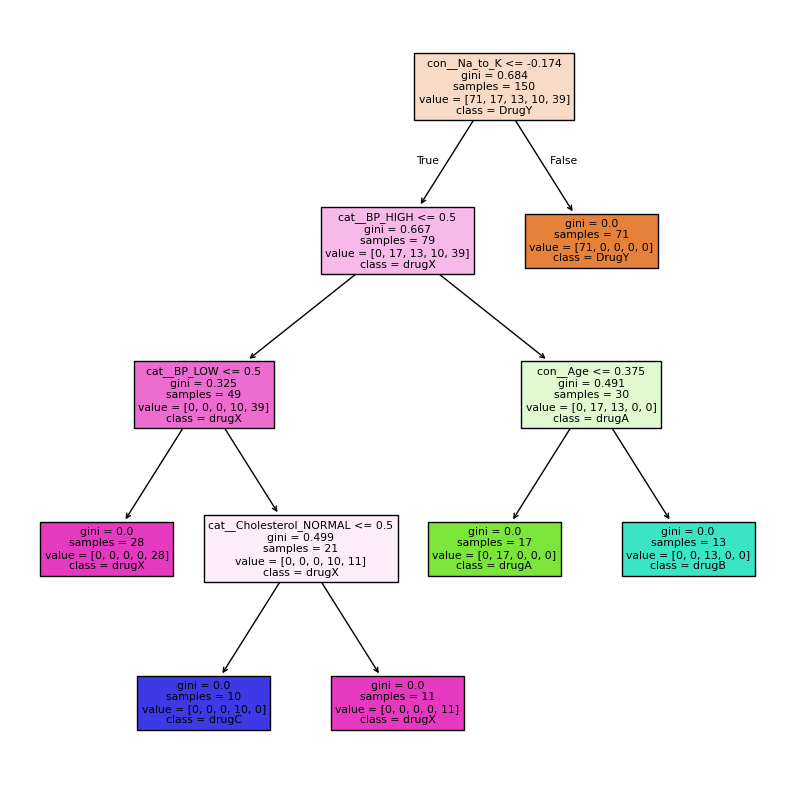

In [176]:
plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=fea_names,class_names=best_dtc.classes_,filled=True)
plt.show()

In [177]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.21487494, 0.05307715, 0.        ,
       0.        , 0.10217351, 0.14369311, 0.4861813 ])

In [178]:
imp_features_bymodel = pd.Series(best_dtc.feature_importances_,index=fea_names)
imp_features_bymodel.sort_values(ascending=False)

con__Na_to_K               0.486181
cat__BP_HIGH               0.214875
con__Age                   0.143693
cat__Cholesterol_NORMAL    0.102174
cat__BP_LOW                0.053077
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.000000
dtype: float64

<Axes: >

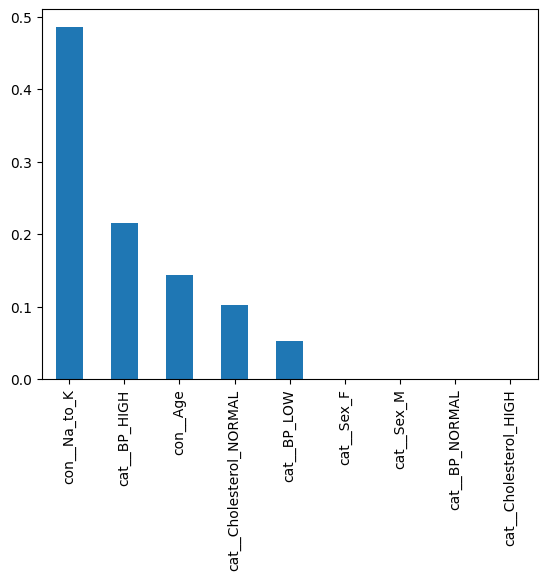

In [179]:
imp_features_bymodel.sort_values(ascending=False).plot(kind='bar')

Above model is providing scores above 0.80, we can cpnsider this model for final model building and use it for out of sample predictions
Step 10: Out of Sample Predictions

In [180]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv'
xnew = pd.read_csv(path2)
xnew.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [181]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [182]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,0.000000


In [183]:
drug_predicted = best_dtc.predict(xnew_pre)

In [184]:
drug_predicted[:10]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX'], dtype=object)

In [185]:
xnew['Drug_Predicted'] = drug_predicted

In [186]:
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predicted
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY


Step11: Save the results to csv file

In [187]:
xnew.to_csv('Drug Results.csv',index=False)